# Examining socio-demographic factors that influence in European voters

## Leave or remain in the European Union? 

<img src='https://static.dezeen.com/uploads/2021/02/brexit-designers-cost-admin_dezeen_2364_col_1-2048x1152.jpg' style='height:400px'>

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Table of Contents:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Dataset<span class="badge badge-primary badge-pill">2</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages">3. Data Exploration<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages">4. Data Visualisation<span class="badge badge-primary badge-pill">4</span></a>    <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="messages">5. Conclusion<span class="badge badge-primary badge-pill">5</span></a>
</div>

<a id="1"></a> <br>
<font size="+3" color="black"><b>1 - Introduction</b></font><br><a id="1"></a>
<br> 

This report will investigated a dataset provided by [European Social Survey](https://www.europeansocialsurvey.org/) (ESS) which is a biennial cross-national survey of attitudes and behaviour from European citizens.

The study will focus on which aspects can influence for a person to vote for your country leave or remain a member of the European Union. After analyzing each variable individually I will build a model that after been trained can predict the probability on a person to vote for your country to Leave the European Union.

There is a R package for the ESS project which allows download data. R-pakacge: [essurvey](https://docs.ropensci.org/essurvey/)

In [1]:
#install.packages("essurvey")
library(essurvey)
library(dplyr)
set_email("pessini.leandro@gmail.com")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
show_countries()

[1] "Albania"            "Austria"            "Belgium"           
 [4] "Bulgaria"           "Croatia"            "Cyprus"            
 [7] "Czechia"            "Denmark"            "Estonia"           
[10] "Finland"            "France"             "Germany"           
[13] "Greece"             "Hungary"            "Iceland"           
[16] "Ireland"            "Israel"             "Italy"             
[19] "Kosovo"             "Latvia"             "Lithuania"         
[22] "Luxembourg"         "Montenegro"         "Netherlands"       
[25] "Norway"             "Poland"             "Portugal"          
[28] "Romania"            "Russian Federation" "Serbia"            
[31] "Slovakia"           "Slovenia"           "Spain"             
[34] "Sweden"             "Switzerland"        "Turkey"            
[37] "Ukraine"            "United Kingdom"

In [3]:
show_rounds()

[1] 1 2 3 4 5 6 7 8 9

<a id="2"></a> <br>
<font size="+3" color="black"><b>2 - Dataset</b></font><br><a id="2"></a>
<br> 

In [4]:
# Importing data - Selecting Round 9 which is the data from 2018
ess_data <- import_rounds(9) %>% recode_missings()

  |======================================================================| 100%


Warning message:
“Round 9  was read with the `foreign` package rather than with  the `haven` package for compatibility reasons.
 Please report any issues at https://github.com/ropensci/essurvey/issues”


In [5]:
head(ess_data)

name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,⋯,inwemm,inwtm,dweight,pspwght,pweight,anweight,domain,prob,stratum,psu
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<fct>,<int>,<fct>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
ESS9e03_1,9,3.1,17.02.2021,27,AT,60,Every day,180,2,⋯,7,46,0.5811743,0.2181114,0.3020914,0.06588958,2,0.0011755485,59,1688
ESS9e03_1,9,3.1,17.02.2021,137,AT,10,Every day,20,7,⋯,6,73,1.0627724,0.4134733,0.3020914,0.12490674,2,0.0006428456,79,88
ESS9e03_1,9,3.1,17.02.2021,194,AT,60,Most days,180,5,⋯,48,92,1.3765086,2.2702928,0.3020914,0.68583600,2,0.0004963272,11,938
ESS9e03_1,9,3.1,17.02.2021,208,AT,45,Every day,120,3,⋯,49,134,0.9933993,0.3864834,0.3020914,0.11675334,2,0.0006877382,74,1998
ESS9e03_1,9,3.1,17.02.2021,220,AT,30,Never,NA,5,⋯,39,40,0.3773534,1.0321022,0.3020914,0.31178924,2,0.0018105009,99,601
ESS9e03_1,9,3.1,17.02.2021,254,AT,45,Only occasionally,NA,8,⋯,12,52,1.4793528,0.5755447,0.3020914,0.17386711,2,0.0004618227,77,68


In [6]:
european_survey <- ess_data[,c("cntry", "eduyrs", "uemp3m", "emplrel", "mbtru", "vteurmmb", "yrbrn", "agea", "gndr")]

In [7]:
head(european_survey)

cntry,eduyrs,uemp3m,emplrel,mbtru,vteurmmb,yrbrn,agea,gndr
<chr>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>
AT,12,No,Employee,No,Remain member of the European Union,1975,43,Male
AT,12,No,Employee,"Yes, previously",Remain member of the European Union,1951,67,Male
AT,12,No,Employee,No,Leave the European Union,1978,40,Female
AT,11,No,Self-employed,No,Remain member of the European Union,1955,63,Male
AT,8,No,Self-employed,No,Remain member of the European Union,1947,71,Female
AT,13,No,Employee,"Yes, previously",Remain member of the European Union,1954,64,Male


In [8]:
nrow(european_survey)

[1] 49519

## Data Dictionary

- __CNTRY__ Country
- __EDUYRS__ Years of full-time education completed
- __UEMP3M__ Ever unemployed and seeking work for a period more than three months
- __EMPLREL__ Employment relation
- __MBTRU__ Member of trade union or similar organisation
- __VTEURMMB__ Would vote for your country to remain member of European Union or leave

EDUYRS Years of full-time education completed
Question:
All rounds: About how many years of education have you completed, whether full-time or part-time? Please report these in full-time equivalents and include compulsory years of schooling.
Values and categories:
77	Refusal
88	Don't know
99	No answer


UEMP3M Ever unemployed and seeking work for a period more than three months
Question:
All rounds: Have you ever been unemployed and seeking work for a period of more than three months?
Values and categories:
1	Yes
2	No
7	Refusal
8	Don't know
9	No answer

EMPLREL Employment relation
Question:
All rounds: In your main job are/were you...
Values and categories:
1	Employee
2	Self-employed
3	Working for own family business
6	Not applicable
7	Refusal
8	Don't know
9	No answer

MBTRU Member of trade union or similar organisation
Question:
ESS1, ESS2, ESS3, ESS4, ESS5, ESS6, ESS7, ESS8: Are you or have you ever been a member of a trade union or similar organisation?
ESS9: Are you or have you ever been a member of a trade union or similar organisation? IF YES, is that currently or previously?
Values and categories:
1	Yes, currently
2	Yes, previously
3	No
7	Refusal
8	Don't know
9	No answer


VTEURMMB Would vote for [country] to remain member of European Union or leave
Question:
ESS8, ESS9: Imagine there were a referendum in [country] tomorrow about membership of the European Union. Would you vote for [country] to remain a member of the European Union or to leave the European Union?
Values and categories:
1	Remain member of the European Union
2	Leave the European Union
33	Would submit a blank ballot paper
44	Would spoil the ballot paper
55	Would not vote
65	Not eligible to vote
77	Refusal
88	Don't know
99	No answer

## Data Transformation

In [9]:
# Checking for NA's in the dataset
sapply(european_survey, function(x) sum(is.na(x)))

cntry   eduyrs   uemp3m  emplrel    mbtru vteurmmb    yrbrn     agea 
       0      708      295     4543      331    13648      222      222 
    gndr 
       0

In [10]:
# Target variable transformation
european_survey$vteurmmb <- as.character(european_survey$vteurmmb)
european_survey$vteurmmb[european_survey$vteurmmb == "Remain member of the European Union"] <- "Remain"
european_survey$vteurmmb[european_survey$vteurmmb == "Leave the European Union"] <- "Leave"
european_survey$vteurmmb[european_survey$vteurmmb == "Would submit a blank ballot paper"] <- NA
european_survey$vteurmmb[european_survey$vteurmmb == "Would spoil the ballot paper"] <- NA
european_survey$vteurmmb[european_survey$vteurmmb == "Would not vote"] <- NA
european_survey$vteurmmb[european_survey$vteurmmb == "Not eligible to vote"] <- NA
european_survey$vteurmmb <- as.factor(european_survey$vteurmmb)

In [11]:
# Cleaning NA values
df_european_survey <- european_survey[complete.cases(european_survey), ]
sapply(df_european_survey, function(x) sum(is.na(x)))

cntry   eduyrs   uemp3m  emplrel    mbtru vteurmmb    yrbrn     agea 
       0        0        0        0        0        0        0        0 
    gndr 
       0

In [12]:
prop.table(table(df_european_survey$vteurmmb))


    Leave    Remain 
0.1331618 0.8668382 

In [13]:
# Data transformation

df_european_survey$uemp3m <- as.character(df_european_survey$uemp3m)
df_european_survey$uemp3m <- as.factor(df_european_survey$uemp3m)
prop.table(table(df_european_survey$uemp3m))


       No       Yes 
0.7009624 0.2990376 

In [14]:
df_european_survey$mbtru <- as.character(df_european_survey$mbtru)
df_european_survey$mbtru[df_european_survey$mbtru == "Yes, currently"] <- "Yes"
df_european_survey$mbtru[df_european_survey$mbtru == "Yes, previously"] <- "Yes"
df_european_survey$mbtru <- as.factor(df_european_survey$mbtru)
prop.table(table(df_european_survey$mbtru))


      No      Yes 
0.568636 0.431364 

In [15]:
df_european_survey$eduyrs <- as.numeric(df_european_survey$eduyrs)

In [16]:
nrow(df_european_survey)

[1] 29926

In [17]:
summary(df_european_survey$agea)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   38.00   53.00   52.08   66.00   90.00 

In [45]:
# Creating a new feature as per age (eg. young, adult, older)
df_european_survey <- df_european_survey %>% 
  mutate(Age_Band = case_when(
    agea < 20 ~ "<20",
    agea >= 20 & agea < 45 ~ "20-45",
    agea >= 45 & agea <= 65 ~ "45-65",
    agea > 65 ~ ">65"))
df_european_survey$Age_Band <- as.factor(df_european_survey$Age_Band)

In [46]:
head(df_european_survey)

cntry,eduyrs,uemp3m,emplrel,mbtru,vteurmmb,yrbrn,agea,gndr,Age_Band
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
AT,12,No,Employee,No,Remain,1975,43,Male,20-45
AT,12,No,Employee,Yes,Remain,1951,67,Male,>65
AT,12,No,Employee,No,Leave,1978,40,Female,20-45
AT,11,No,Self-employed,No,Remain,1955,63,Male,45-65
AT,8,No,Self-employed,No,Remain,1947,71,Female,>65
AT,13,No,Employee,Yes,Remain,1954,64,Male,45-65


In [49]:
library(ggplot2)
library(ggthemes)
library(gghighlight)

In [50]:
# Change the default plots size 
options(repr.plot.width=15, repr.plot.height=10)

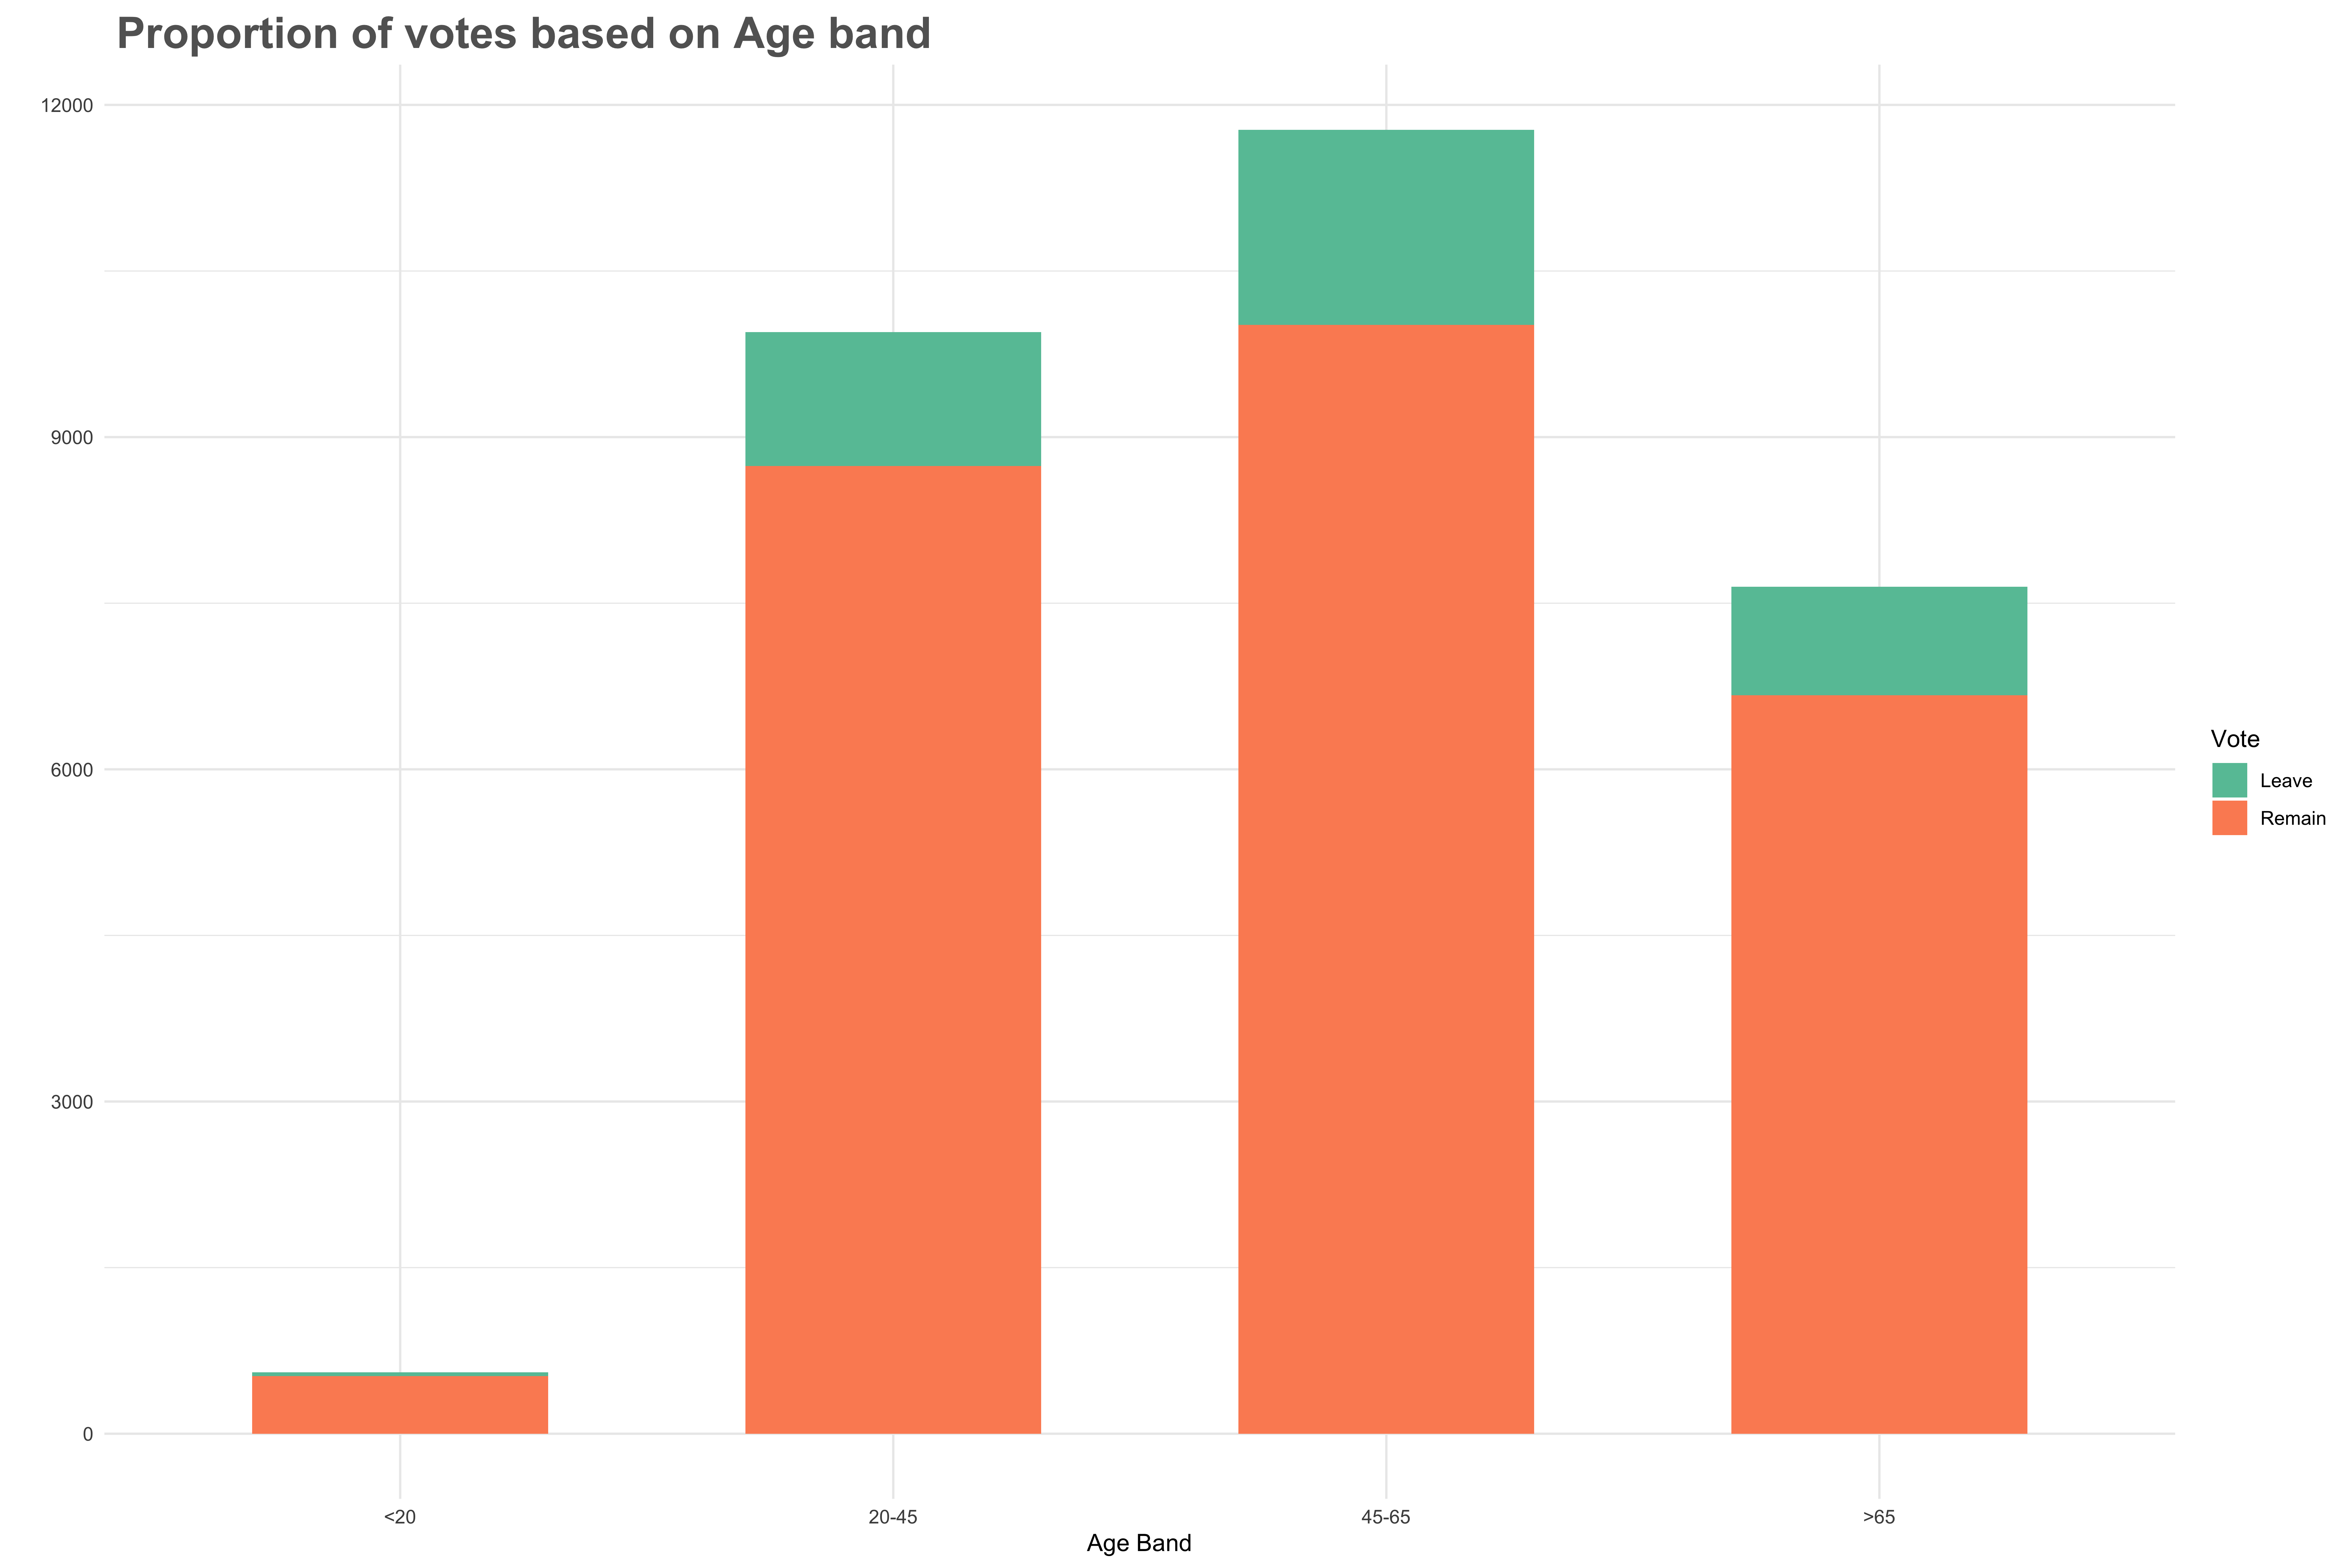

In [51]:
df_european_survey %>%
  mutate(Age_Band = factor(Age_Band, levels=c("<20", "20-45", "45-65", ">65"))) %>%
  ggplot(aes(x=Age_Band)) + 
  geom_bar(aes(fill=vteurmmb), stat="count", width = .6) +
  scale_fill_brewer(palette='Set2') +
  labs( x = "Age Band",
        y = "",
        fill = "Vote",
        title = " Proportion of votes based on Age band") + theme_minimal() +
  theme(plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=20))

<a id="5"></a> <br>
<font size="+3" color="black"><b>5 - Past iteration</b></font><br><a id="5"></a>
<br> 

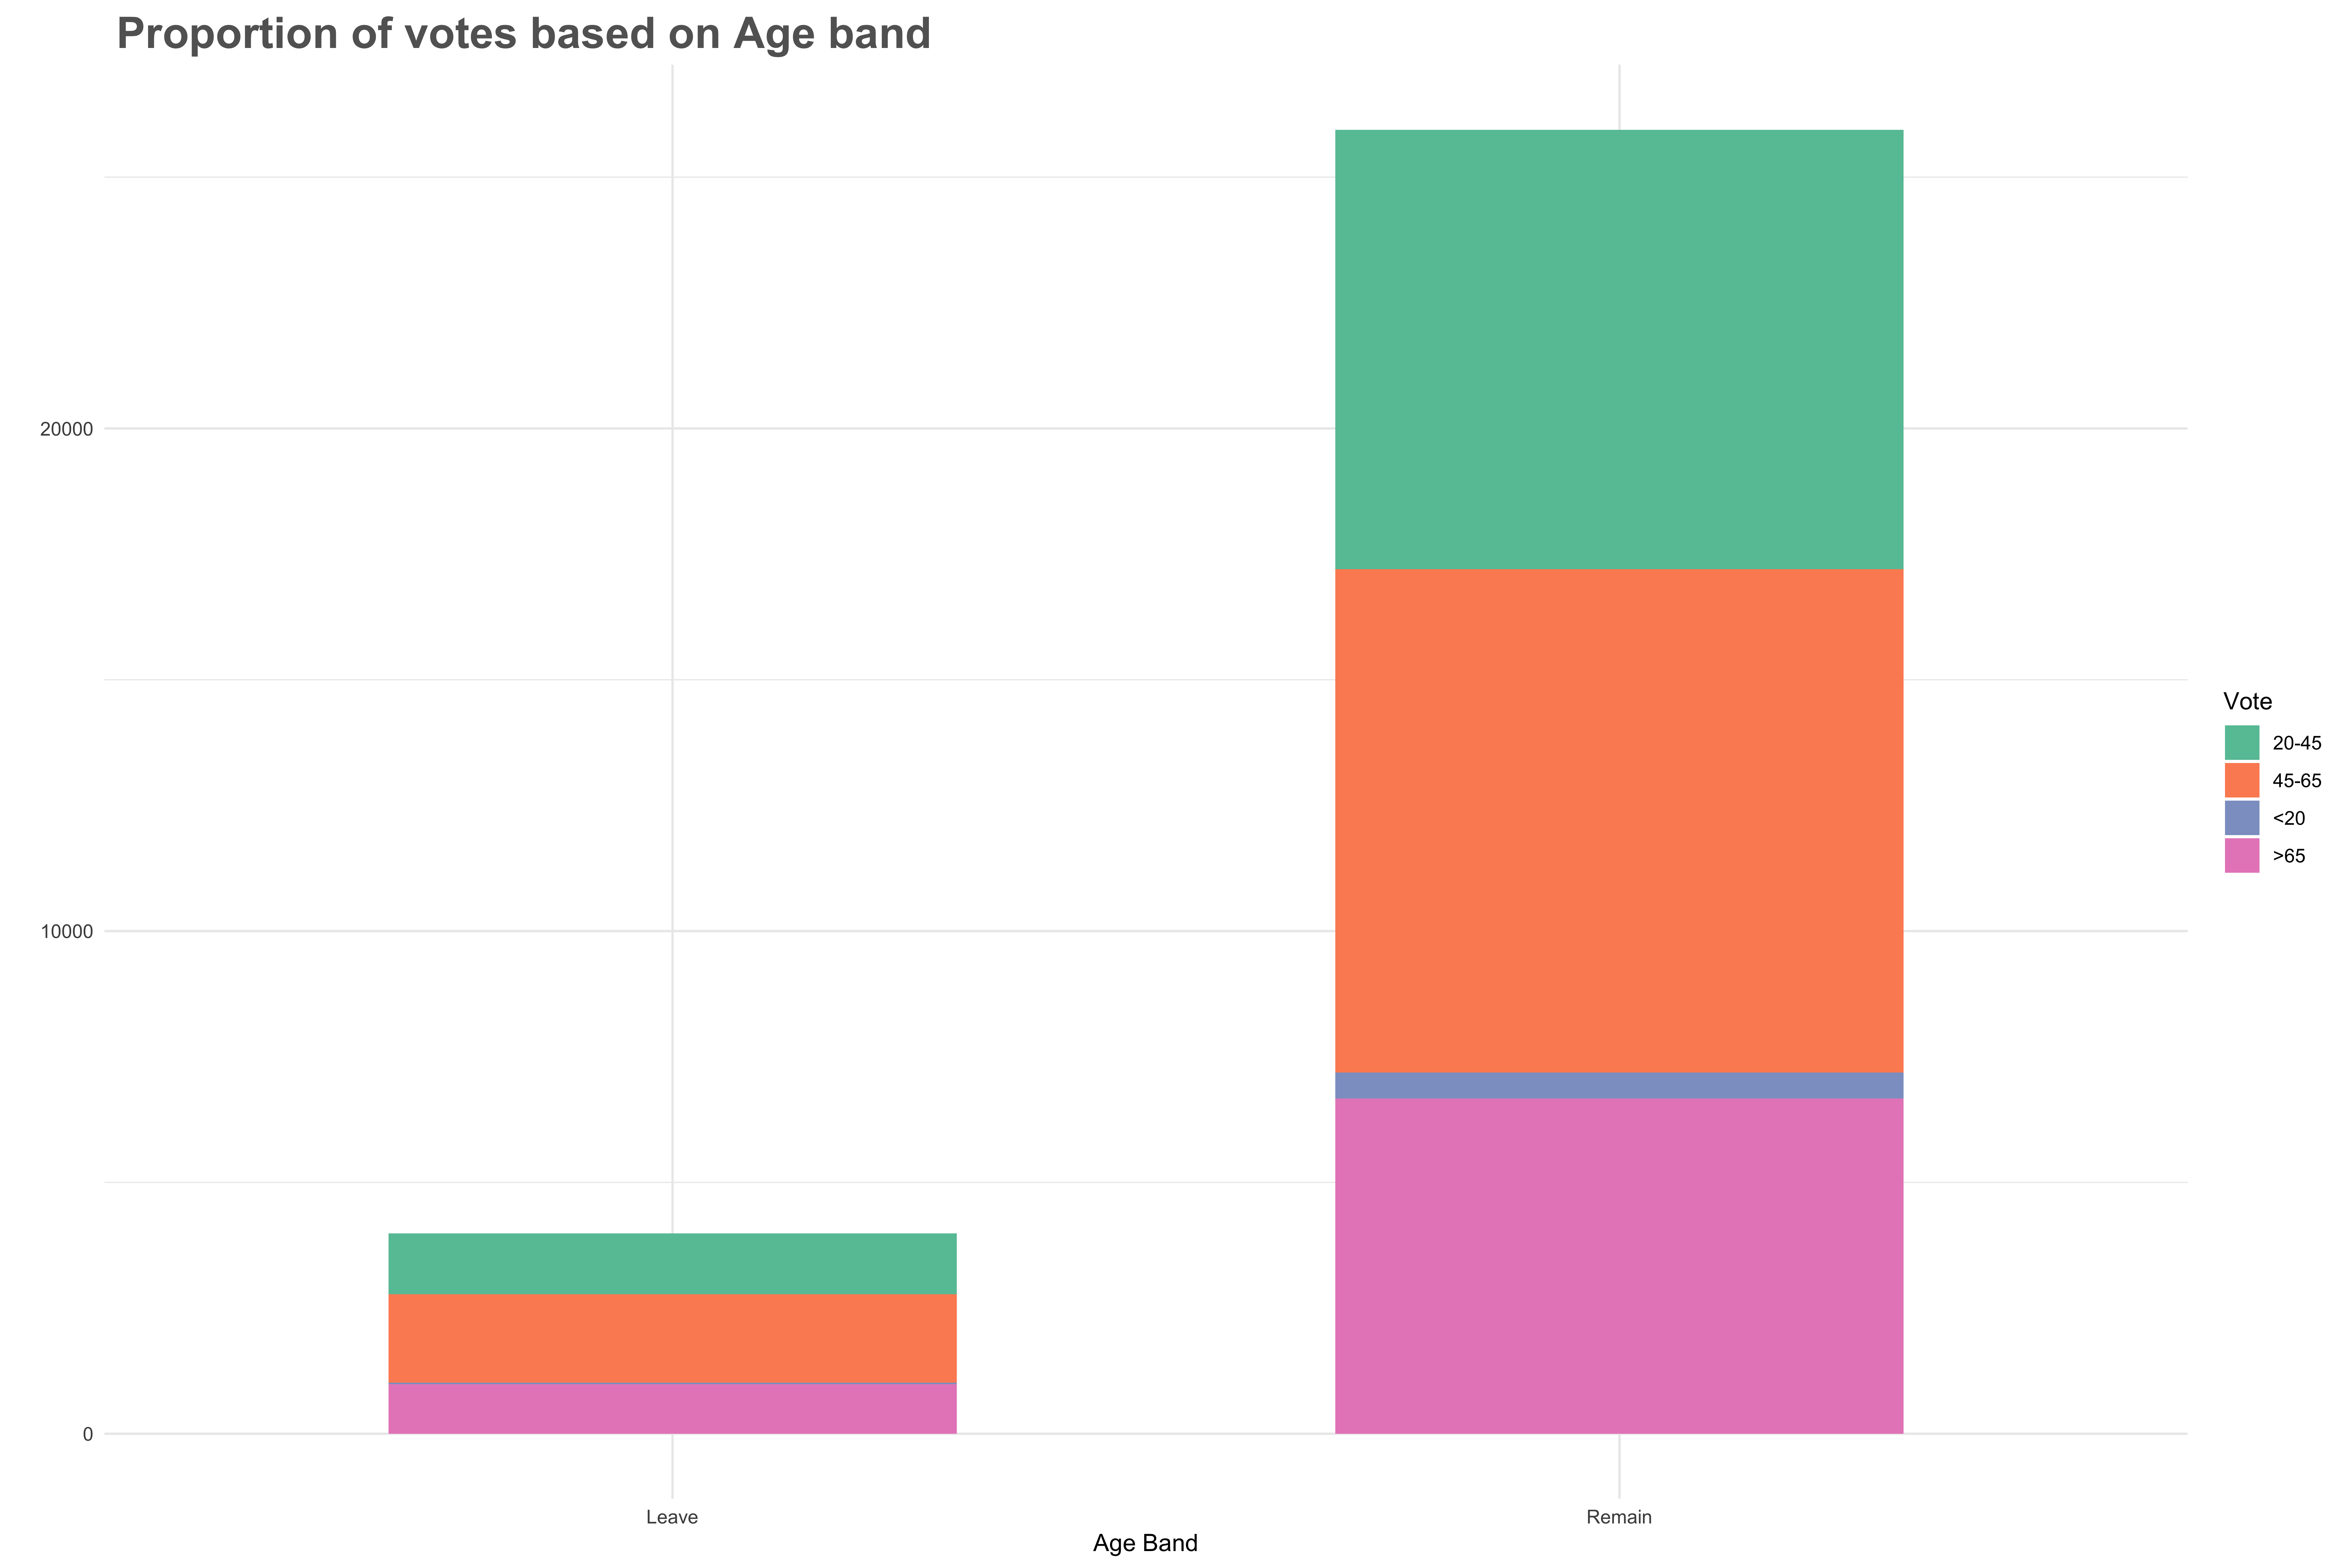

In [52]:
df_european_survey %>%
  ggplot(aes(x=vteurmmb)) + 
  geom_bar(aes(fill=Age_Band), stat="count", width = .6) +
  scale_fill_brewer(palette='Set2') +
  labs( x = "Age Band",
        y = "",
        fill = "Vote",
        title = " Proportion of votes based on Age band") + theme_minimal() +
  theme(plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=20))